In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("finalInput.csv",encoding="ISO-8859-1")
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df.head()

,Unnamed: 0,NewsContent,author,publishedDate,title,AAPL_company,IBM_company,GOOGL_company,AMZN_company,MSFT_company,AAPL_senti,IBM_senti,GOOGL_senti,AMZN_senti,MSFT_senti
0,0,"MILAN/ROME, March 27 (Reuters) - Italian stat...",NaN,2019-03-27 13:22:00,Italian state lender seeks to broker truce bet...,0,0,0,0,0,0,0,0,0,0
1,1,April 5 (Reuters) - Representatives of Venezu...,NaN,2019-04-05 18:23:00,Lawyers for Venezuela's Guaido ask U.S. court ...,0,0,0,0,0,0,0,0,0,0
2,2,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,2019-04-05 17:49:00,Petrobras agrees to sell pipeline unit to Engi...,0,0,0,0,0,0,0,0,0,0
3,3,Top Tech Stocks MSFT -1.59% AAPL +0.61% IBM -0...,MT Newswires,2019-03-27 13:18:46,"Technology Sector Update for 03/27/2019: NTWK,...",1,0,1,0,1,1,0,-1,0,-1
4,4,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,2019-04-05 17:49:00,Engie bids $8.6 bln for Petrobras pipeline uni...,0,0,0,0,0,0,0,0,0,0


In [4]:
# number of news in each company
df_Newscompany = df.drop(['Unnamed: 0','author','publishedDate','title','NewsContent','AAPL_senti','IBM_senti','GOOGL_senti','AMZN_senti','MSFT_senti'], axis = 1)
counts = []
categories = list(df_Newscompany.columns.values)
for i in categories:
    counts.append((i,df_Newscompany[i].sum()))
    df_stats = pd.DataFrame(counts,columns=["categories","number_of_comments"])
df_stats

,categories,number_of_comments
0,AAPL_company,128
1,IBM_company,90
2,GOOGL_company,109
3,AMZN_company,27
4,MSFT_company,103


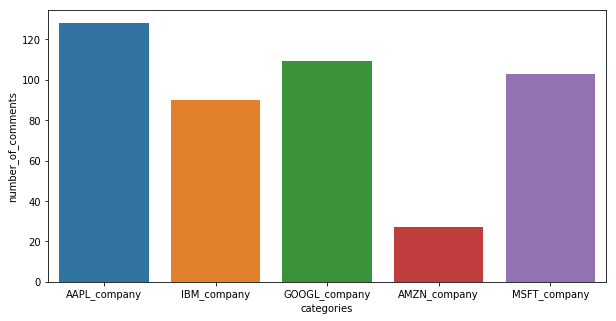

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='categories',y='number_of_comments',data=df_stats)

# APPL

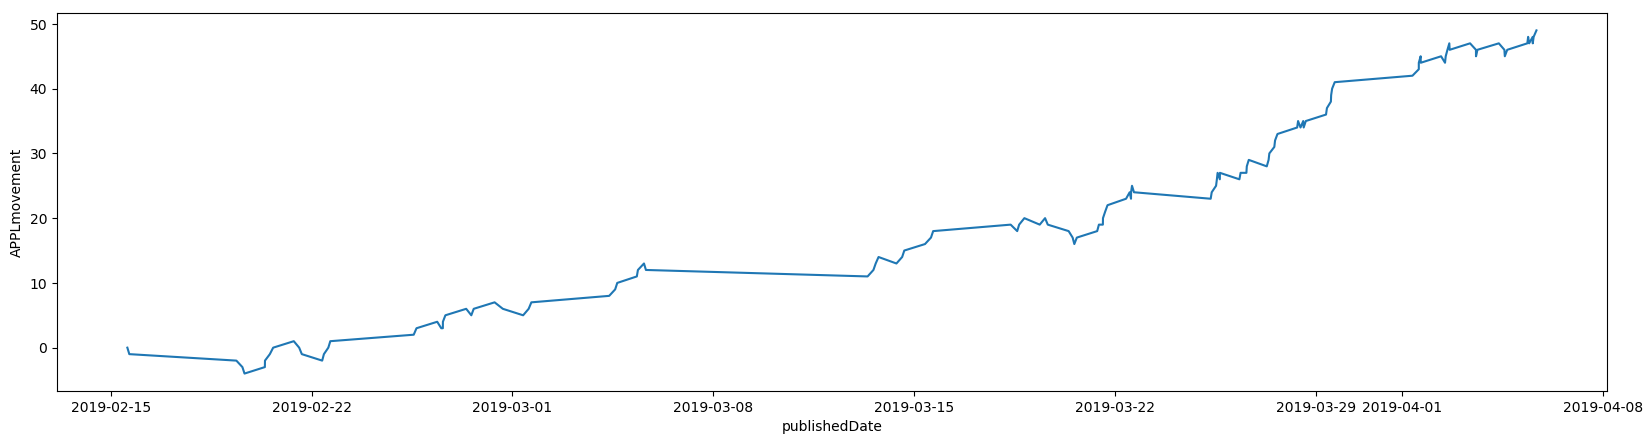

In [5]:
dfAPPL = df[df['AAPL_company'] == 1]
dfAPPL = dfAPPL.sort_values(by=['publishedDate'])

appleSenti_list = []
appleScore = list(dfAPPL['AAPL_senti'])
for a in range(len(appleScore)):
    score = sum(appleScore[0:a])
    appleSenti_list.append(score)
    
dfAPPL['APPLmovement'] = appleSenti_list

plt.figure(figsize=(20,5),dpi=100)
ax = sns.lineplot(x='publishedDate',y = 'APPLmovement', data =dfAPPL )
#plt.ylim((-5,60))

# GOOGL

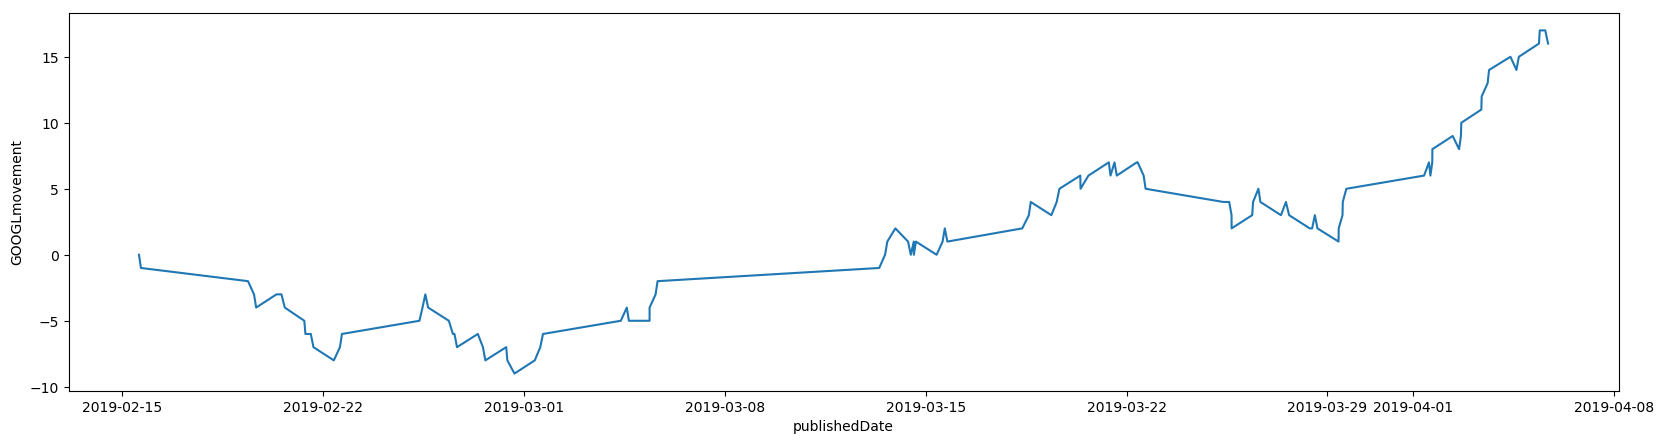

In [6]:
dfGOOGL = df[df['GOOGL_company'] == 1]
dfGOOGL = dfGOOGL.sort_values(by=['publishedDate'])

GOOGLSenti_list = []
GOOGLScore = list(dfGOOGL['GOOGL_senti'])
for a in range(len(GOOGLScore)):
    score = sum(GOOGLScore[0:a])
    GOOGLSenti_list.append(score)
    
dfGOOGL['GOOGLmovement'] = GOOGLSenti_list

plt.figure(figsize=(20,5),dpi=100)
ax = sns.lineplot(x='publishedDate',y = 'GOOGLmovement', data =dfGOOGL )
#plt.ylim((-5,60))

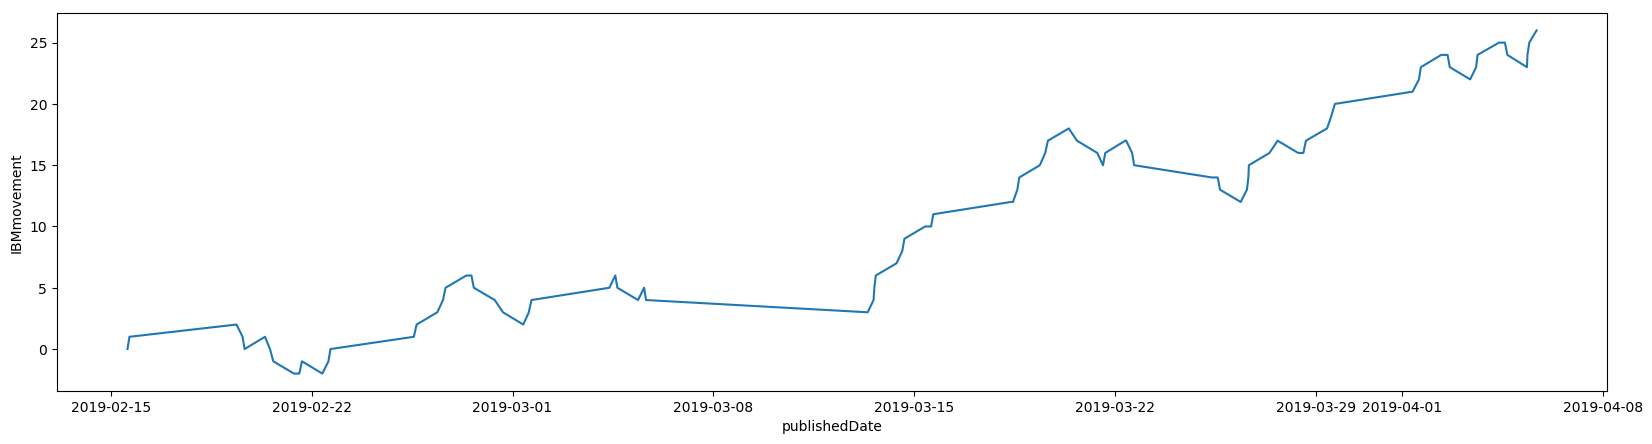

In [7]:
dfIBM = df[df['IBM_company'] == 1]
dfIBM = dfIBM.sort_values(by=['publishedDate'])

IBMSenti_list = []
IBMScore = list(dfIBM['IBM_senti'])
for a in range(len(IBMScore)):
    score = sum(IBMScore[0:a])
    IBMSenti_list.append(score)
    
dfIBM['IBMmovement'] = IBMSenti_list

plt.figure(figsize=(20,5),dpi=100)
ax = sns.lineplot(x='publishedDate',y = 'IBMmovement', data =dfIBM )
#plt.ylim((-5,60))

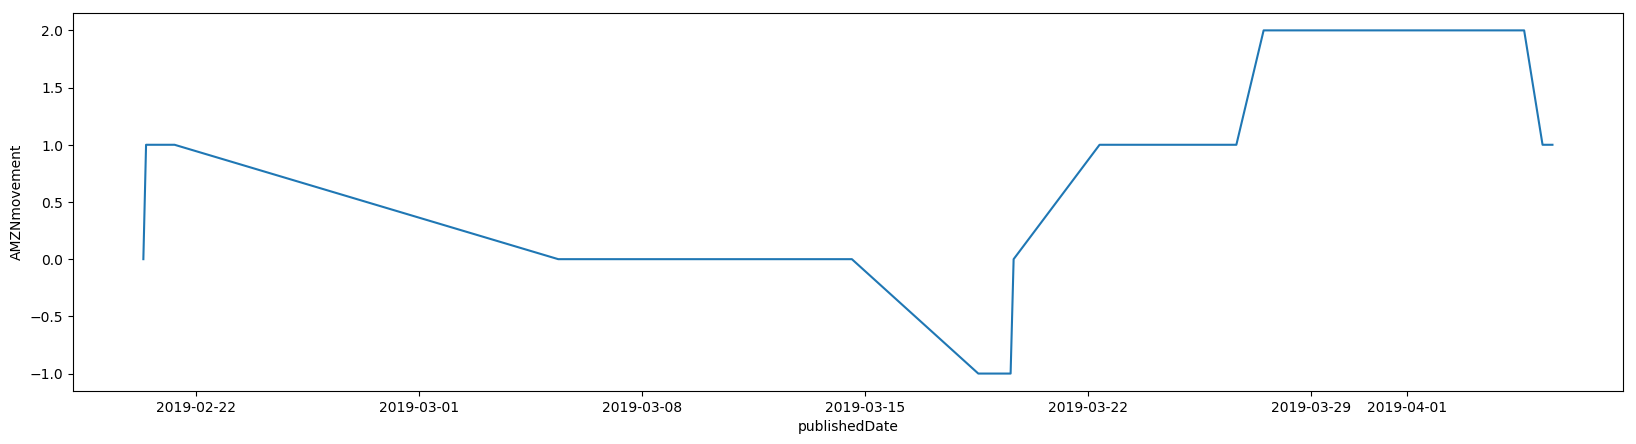

In [8]:
dfAMZN = df[df['AMZN_company'] == 1]
dfAMZN = dfAMZN.sort_values(by=['publishedDate'])

AMZNSenti_list = []
AMZNScore = list(dfAMZN['IBM_senti'])
for a in range(len(AMZNScore)):
    score = sum(AMZNScore[0:a])
    AMZNSenti_list.append(score)
    
dfAMZN['AMZNmovement'] = AMZNSenti_list

plt.figure(figsize=(20,5),dpi=100)
ax = sns.lineplot(x='publishedDate',y = 'AMZNmovement', data =dfAMZN )
#plt.ylim((-5,60))

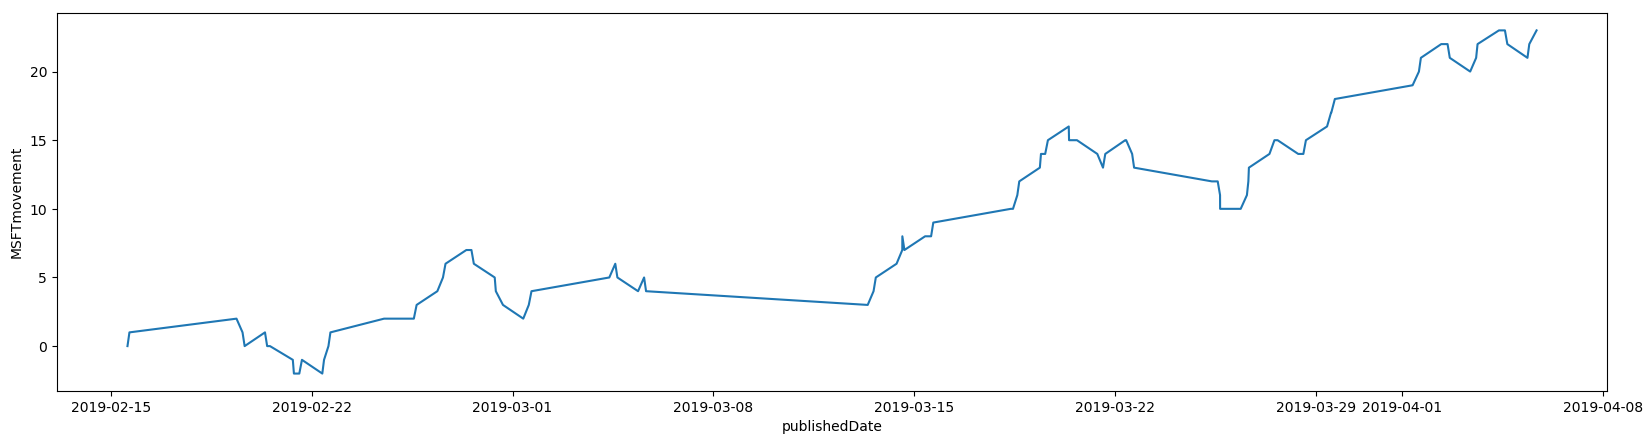

In [9]:
dfMSFT = df[df['MSFT_company'] == 1]
dfMSFT = dfMSFT.sort_values(by=['publishedDate'])

MSFTSenti_list = []
MSFTScore = list(dfMSFT['IBM_senti'])
for a in range(len(MSFTScore)):
    score = sum(MSFTScore[0:a])
    MSFTSenti_list.append(score)
    
dfMSFT['MSFTmovement'] = MSFTSenti_list

plt.figure(figsize=(20,5),dpi=100)
ax = sns.lineplot(x='publishedDate',y = 'MSFTmovement', data =dfMSFT )
#plt.ylim((-5,60))